In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<p>1. Evolución temporal de ventas por filial

1a. ¿Cómo han evolucionado las ventas (importe total) a lo largo del tiempo para cada fuente?

1.b ¿Cuál es la aportación de cada web a las ventas totales? Muestrelo gráficamente

2. Muestre un gráfico ordenando las ventas de los comerciales de mayor a menor
 2.a Muestre un gráfico con el porcentaje que suponen las ventas de cada comercial en la Fuente Rdp.



3. Descuentos y ampliaciones

1a Muestre gráficamente qué 3 comerciales tienen más descuentos
1b muestre gráficamente qué 3 comerciales tienen más ampliaciones


4. Cumplimiento de plazos

Pregunta: ¿Cuántas entregas se realizaron fuera de la fecha prevista (Fecha Entrega vs F.P.R.) y hay diferencias entre filiales o tipos de comercial?

Visualización sugerida: Gráfico de dispersión (scatter plot) o heatmap de retrasos (Fecha Entrega - F.P.R.) por filial y tipo de comercial.

5. Geolocalización de ventas

Pregunta: ¿Dónde se concentran las ventas en Madrid según las direcciones? ¿Hay zonas con mayor importe total?

Visualización sugerida: Mapa de calor (heatmap) o scatter plot georreferenciado usando latitud/longitud extraída de la columna Dirección y tamaño/color según Importe.</p>

In [131]:
ventas_total=pd.read_excel(r"C:\Users\Abraham\Desktop\Solo\Bootcamp\portfolio\PowerBI\ventas2025.xlsx")

In [132]:
#transformo columna "fecha aceptación" de object a fecha
ventas_total["Fecha Acepta"]=pd.to_datetime(ventas_total["Fecha Acepta"],dayfirst=True)
#extraigo mes junto con año
ventas_total["Mes"]=ventas_total["Fecha Acepta"].dt.to_period("M")

In [133]:
ventas_total.drop("Column1",axis=1,inplace=True)
ventas_comerciales=ventas_total[ventas_total["Departamento"]=="Comercial"]

### 1. Evolución temporal de ventas por web

<p> 1a. ¿Cómo han evolucionado las ventas (importe total) a lo largo del tiempo para cada fuente? </p>


In [135]:
#Obtenemos las ventas desglosadas por mes y por fuente
ventas_mes=ventas_comerciales.groupby(["Mes","Fuente"])["Importe"].sum().reset_index()

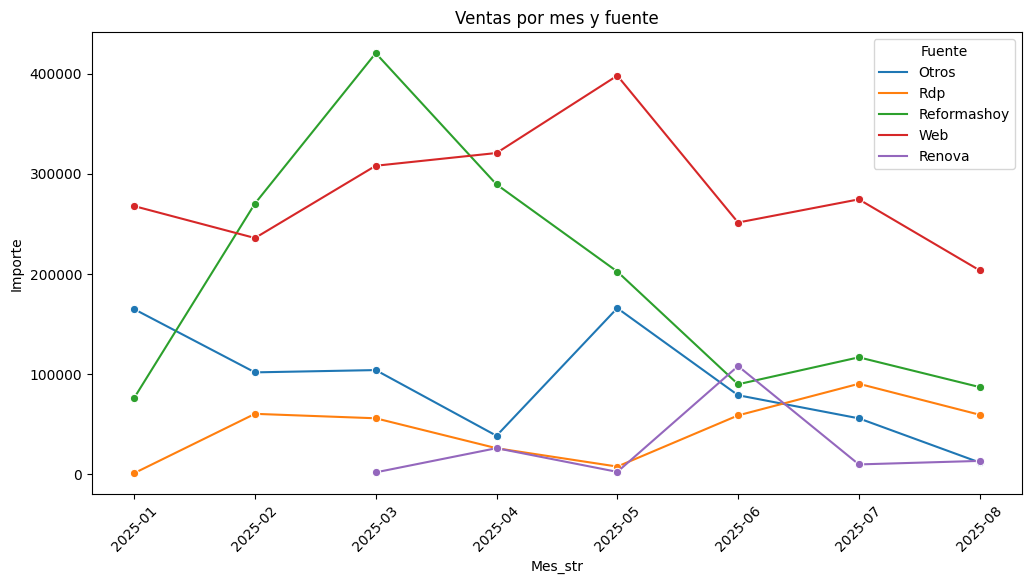

In [136]:
#creo mes en string para graficar
ventas_mes["Mes_str"] = ventas_mes['Mes'].astype(str)

#Creo el gráfico
plt.figure (figsize=(12,6))
sns.lineplot(data=ventas_mes, x="Mes_str", y="Importe", hue="Fuente", marker="o")
plt.xticks(rotation=45)
plt.title("Ventas por mes y fuente")
plt.show()

<p>Extra, obtener 1a también con pivot table</p>

In [146]:
#creo la tabla pivot
ventas_pivot_test= ventas_comerciales.pivot_table(index="Mes", columns="Fuente", values="Importe", aggfunc="sum")

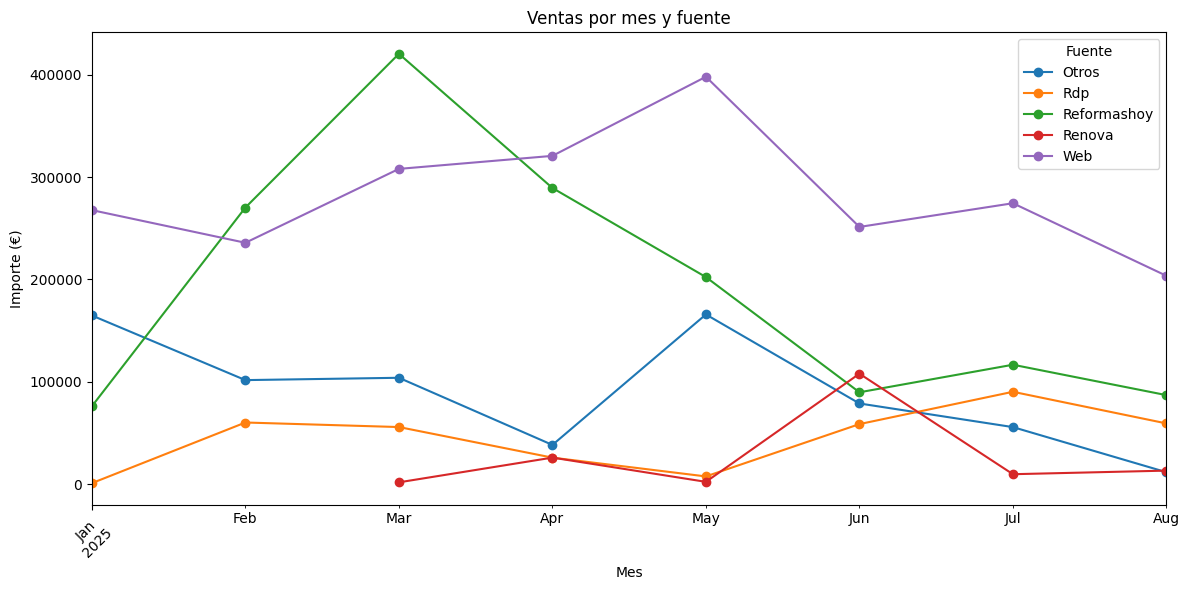

In [147]:
# Convertir Period a datetime para eje X continuo

ventas_pivot_test.plot(kind='line', figsize=(12,6), marker='o')

plt.title("Ventas por mes y fuente")
plt.xlabel("Mes")
plt.ylabel("Importe (€)")
plt.xticks(rotation=45)
plt.legend(title='Fuente')
plt.tight_layout()
plt.show()


#### 1.b ¿Cuál es la aportación de cada web a las ventas totales? Muestrelo gráficamente

In [148]:

import plotly.express as px

In [151]:
fig=px.pie(ventas_mes,values="Importe",names="Fuente")
fig.show()

<p> Extra: muestre las ventas y ordene las fuentes de mayor a menor </p>

In [154]:
ventas_fuente=ventas_comerciales.groupby("Fuente")["Importe"].sum().reset_index()

In [157]:
ventas_fuente.sort_values("Importe",ascending=False)

,Fuente,Importe
4,Web,2259374.53
2,Reformashoy,1551451.18
0,Otros,719985.03
1,Rdp,357863.06
3,Renova,160167.26


### 2. Ventas por comerciales

<p>Muestre un gráfico ordenando las ventas de los comerciales de mayor a menor
 </p>

In [184]:
ventas_agrupado= ventas_comerciales.groupby("Empleado").sum("Importe").sort_values(by="Importe",ascending=False).reset_index()

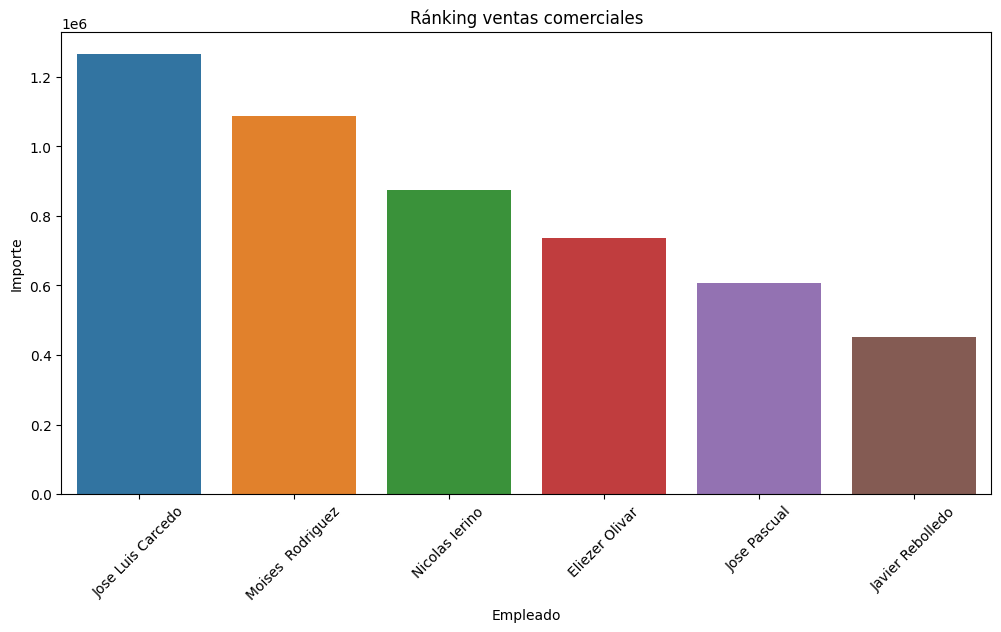

In [190]:
plt.figure(figsize=(12,6))
sns.barplot(data=ventas_agrupado.head(6),x="Empleado",y="Importe")
plt.xticks(rotation=45)
plt.title ("Ránking ventas comerciales")
plt.show()

<p> 2.a Muestre un gráfico con el porcentaje que suponen las ventas de cada comercial en la Fuente Rdp  resalte a "Moises".</p>

In [165]:
ventas_comerciales_rdp=ventas_comerciales[ventas_comerciales["Fuente"]=="Rdp"]

In [197]:
ventas_comercial_agrupado_rdp=ventas_comerciales_rdp.groupby(["Comercial/Telemarketing/Técnico"])["Importe"].sum().reset_index().sort_values(by="Importe", ascending=False)

In [219]:
fig=go.Figure(data=[go.Pie(labels=ventas_comercial_agrupado_rdp["Comercial/Telemarketing/Técnico"], values=ventas_comercial_agrupado_rdp["Importe"],hole=0.5)])
fig